---
## **Grover for 4 Coloring Problems**
---

In this section, we will expand upon the approach we developed in Part 1 to tackle the 4 Coloring Problem. After centuries of debate, it was proven that *any* Graph Coloring problem can be solved with 4 colors. So, being able to use Grover's algorithm to solve the 4 Coloring Problem is enough to solve *any* Graph Coloring problem with Grover's algorithm.

<br>

We will do so through these parts:

**Part 2.1**: A First Approach

**Part 2.2**: A Faster Approach

**Part 2.3**: Beyond Coloring

---
### **Part 2.1: A First Approach**
---

To start, we will attempt taking a very similar approach to the one we developed above. There are two main adjustments that need to occur:

* To represent 4 possible colors per Country, we need to use *2 qubits*. So now, each Country can be in any of these four states (the colors listed below are just for sake of example): 
  * 00: White
  * 01: Red
  * 10: Orange
  * 11: Black

* To make sure that two Countries are colored differently, we will compare each digit and make sure there is at least one difference. For instance, 00 01 is ok since the 2nd digit (0 and 1) is different in each number even though the first one is the same (0). This first approach will require the use of **ancilla** (extra) qubits.

<br>

We have provided the fully updated graph coloring oracle below. Over the first few problems, you will define the necessary functions for this to work, `disagree_multi_q` and `undo_disagree_multi_q`.

**Run the code below before moving onto Problem #2.1.1.**

In [ ]:
def graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit):

  # 1. Initializing a quantum circuit with the output bit in the |−⟩ state.
  num_vars = len(variable_qubits)
  num_checks = len(check_qubits)
  num_outputs = 1

  oracle = QuantumCircuit(num_vars + num_checks + num_outputs)
  oracle.x(output_qubit)
  oracle.h(output_qubit)


  # 2. Checking if each pair of qubits in a given list, disagree_list, disagree with each other.
  # Storing the ancilla qubits used for each check
  ancillas = []
  for i in range(len(disagree_list)):
    ancillas += [ disagree_check_4c(oracle,
                                  disagree_list[i][0], 
                                  disagree_list[i][1], 
                                  check_qubits[i]) ]

  
  # 3. Flip the output bit if all disagreements are satisfied.
  oracle.mct(check_qubits, output_qubit)


  # 4. Resetting all the extra qubits for the next iteration.
  # Need to include the specific ancillas used for each check
  for i in range(len(disagree_list)):
    undo_disagree_check_4c(oracle, 
                           disagree_list[i][0], 
                           disagree_list[i][1], 
                           check_qubits[i], 
                           ancillas[i])

  
  return oracle

#### **Problem #2.1.1**

To start, let's work out what the `disagree_check_4c(...)` function needs to do part by part and then we can put it into a function in Problem #2.1.2. The overall goal of this function is to flip the check qubit if at least one pair of digits disagree. We will accomplish this as follows:

1. Add 2 ancilla qubits to the circuit. This provides 1 per digit.
1. Check if the first digit of each state *agrees*.
1. Check if the second digit of each state *agrees*.
1. Flip the check bit if either *disagree*.

**To get started, run the code below. You will refer to these variables throughout this problem.**

In [ ]:
qc = QuantumCircuit(5)
qubits_a = [0, 1]
qubits_b = [2, 3]
check_qubit = 4

##### **1. Add 2 ancilla qubits to the circuit.**

In [ ]:
ancillas = [AncillaQubit(), # COMPLETE THIS LINE
qc.add_bits(ancillas)

qc.draw()

###### **Solution**

In [ ]:
ancillas = [AncillaQubit(), AncillaQubit()]
qc.add_bits(ancillas)

qc.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
  5: 
     
  6:

##### **2. Check if the first digit of each state agrees.**

The following information may be helpful for completing this code:
* The first digit is stored in the 0th index of each: `qubit_a[0]` and `qubit_b[0]`.
* The corresponding ancilla qubit, `ancillas[0]`, should store the result of this check.
* Checking for agreement is the same as checking for disagreement and then flipping the qubit.
* We checked for disagreement of qubits in Part 1 and have generally seen that the X gate can be used to flip qubit states.

In [ ]:
qc.# COMPLETE THIS LINE
qc.# COMPLETE THIS LINE
qc.# COMPLETE THIS LINE

###### **Solution**

In [ ]:
qc.cx(qubits_a[0], ancillas[0])
qc.cx(qubits_b[0], ancillas[0])
qc.x(ancillas[0])

##### **3. Check if the second digit of each state agrees.**

Do the same as above, but for the 2nd digits.

In [ ]:
qc.# COMPLETE THIS LINE
qc.# COMPLETE THIS LINE
qc.# COMPLETE THIS LINE

###### **Solution**

In [ ]:
qc.cx(qubits_a[1], ancillas[1])
qc.cx(qubits_b[1], ancillas[1])
qc.x(ancillas[1])

##### **4. Flip the check bit if either disagree.**

The following information may be helpful for completing this code:
* It's easiest to first check if all the digits agree and then flip the output.
* The multi-controlled target gate allows for checking multiple qubits at once and storing the result.
* The ancillas store the results we need to check.

In [ ]:
qc.# COMPLETE THIS LINE
qc.# COMPLETE THIS LINE

qc.draw()

###### **Solution**

In [ ]:
qc.mct(ancillas, check_qubit)
qc.x(check_qubit)

qc.draw()

q_0: ──■────────────────────────────────
       │                                
q_1: ──┼────■───────────────────────────
       │    │                           
q_2: ──┼────┼────■──────────────────────
       │    │    │                      
q_3: ──┼────┼────┼────■─────────────────
       │    │    │    │       ┌───┐┌───┐
q_4: ──┼────┼────┼────┼───────┤ X ├┤ X ├
     ┌─┴─┐  │  ┌─┴─┐  │  ┌───┐└─┬─┘└───┘
  5: ┤ X ├──┼──┤ X ├──┼──┤ X ├──■───────
     └───┘┌─┴─┐└───┘┌─┴─┐├───┤  │       
  6: ─────┤ X ├─────┤ X ├┤ X ├──■───────
          └───┘     └───┘└───┘

##### **If you happen to be curious about why we are taking this approach**: 

To allow for one pair of digits to agree and the other to disagree using quantum circuits, we take advantage of the fact that the following two statements are the same:

1. ($q_0$ and $q_2$ disagree) OR ($q_1$ and $q_3$ disagree)

1. NOT( ($q_0$ and $q_2$ agree) AND ($q_1$ and $q_3$ agree) )

The second statement is easier to implement in quantum circuits directly because NOT can be encoded with an X gate and AND can be encoded with the multi-controlled gate (or a Toffoli since we have 2 ancilla qubits as our controls) amongst other approaches. The equivalence of those two statements is technically known as De Morgan's law.

#### **Problem #2.1.2**

Now, complete the code below by filling it in with the parts you developed in Problem #2.1.1. The only addition is that you must also return the ancilla qubits so that this operation can be undone (reset) for future iterations.

In [ ]:
def disagree_check_4c(qc, qubits_a, qubits_b, check_qubit):

  # 1. Add 2 ancilla qubits to the circuit. This provides 1 per digit.
  # COMPLETE THIS CODE


  # 2. Check if the first digit of each state agrees.
  # COMPLETE THIS CODE

  # 3. Check if the second digit of each state agrees.
  # COMPLETE THIS CODE

  # 4. Flip the check bit if either disagree.
  # COMPLETE THIS CODE


  # Return ancillas so that we can undo this operation later on
  return # COMPLETE THIS LINE

##### **Solution**

In [ ]:
def disagree_check_4c(qc, qubits_a, qubits_b, check_qubit):

  # 1. Add 2 ancilla qubits to the circuit. This provides 1 per digit.
  ancillas = [AncillaQubit(), AncillaQubit()]
  qc.add_bits(ancillas)


  # 2. Check if the first digit of each state agrees.
  qc.cx(qubits_a[0], ancillas[0])
  qc.cx(qubits_b[0], ancillas[0])
  qc.x(ancillas[0])

  # 3. Check if the second digit of each state agrees.
  qc.cx(qubits_a[1], ancillas[1])
  qc.cx(qubits_b[1], ancillas[1])
  qc.x(ancillas[1])

  # 4. Flip the check bit if either disagree.
  qc.mct(ancillas, check_qubit)
  qc.x(check_qubit)


  # Return ancillas so that we can undo this operation later on
  return ancillas

#### **Problem #2.1.3**

Next, we need to define the function that *undoes* this operation, `undo_disagree_check_4c(...)`. Instead of returning the ancillas, this function takes them in and uses them to make sure they get reset properly.

**Complete the code below by applying the gates from `disagree_check_4c(...)` in the opposite order.**

In [ ]:
def undo_disagree_check_4c(qc, qubits_a, qubits_b, check_qubit, ancillas):

  # 4. UNDO Flip the check bit if either disagree.
  # COMPLETE THIS CODE

  # 3. UNDO Check if the second digit of each state agrees.
  # COMPLETE THIS CODE

  # 2. UNDO Check if the first digit of each state agrees.
  # COMPLETE THIS CODE

##### **Solution**

**NOTE**: It is vital that the X gates and CX & MCT gates are reversed, as well as the order of steps. However, technically the CX gates within each step commute with each other since `qubits_a` and `qubits_b` are completely different qubits.

In [ ]:
def undo_disagree_check_4c(qc, qubits_a, qubits_b, check_qubit, ancillas):

  # 4. UNDO Flip the check bit if either disagree.
  qc.x(check_qubit)
  qc.mct(ancillas, check_qubit)


  # 3. UNDO Check if the second digit of each state agrees.
  qc.x(ancillas[1])
  qc.cx(qubits_a[1], ancillas[1])
  qc.cx(qubits_b[1], ancillas[1])


  # 2. UNDO Check if the first digit of each state agrees.
  qc.x(ancillas[0])
  qc.cx(qubits_a[0], ancillas[0])
  qc.cx(qubits_b[0], ancillas[0])

#### **Problem #2.1.4**

Lastly, we need to define an updated version of `check_disagree_list_general(...)` that accounts for the multiple digits: `check_disagree_list_general_4c(...)`.


As a reminder, this function was used for verifying the correct states as follows:
* It takes in a string representation of a measured state, called `state`.
* It takes in `disagree_list`.
* It compares every pair of bits listed in the `disagree_list`.
* If any pair of bits are the same, then the function returns `False`.
* Otherwise, the function returns `True`.

In [ ]:
def check_disagree_list_general_4c(state, disagree_list):

  for i in range(len(disagree_list)):
    
    if (state[disagree_list[i][0][0]] == state[disagree_list[i][1][0]] 
        and state[disagree_list[i][0][1]] == state[disagree_list[i][1][1]]):
        return # COMPLETE THIS LINE

  return # COMPLETE THIS LINE

##### **Solution**

In [ ]:
def check_disagree_list_general_4c(state, disagree_list):

  for i in range(len(disagree_list)):
    
    if (state[disagree_list[i][0][0]] == state[disagree_list[i][1][0]] 
        and state[disagree_list[i][0][1]] == state[disagree_list[i][1][1]]):
        return False

  return True

##### **Run the code below to verify that your function works properly.**

In [ ]:
check1 = (check_disagree_list_general_4c('1111', [[[0, 1], [2, 3]]]) == False)
check2 = (check_disagree_list_general_4c('0111', [[[0, 1], [2, 3]]]) == True)
check3 = (check_disagree_list_general_4c('0110', [[[0, 1], [2, 3]]]) == True)
check4 = (check_disagree_list_general_4c('0101', [[[0, 1], [2, 3]]]) == False)

if not check1:
  print("1111 Fails")

if not check2:
  print("0111 Fails")

if not check3:
  print("0110 Fails")

if not check4:
  print("0101 Fails")

if check1 and check2 and check3 and check4:
  print("Success, keep moving!")

Success, keep moving!


#### **Problem #2.1.5**

Let's put these functions to use! Specifically,

1. Define the problem.
1. Solve the problem.


The goal of this problem is to color 3 countries that all border each other (something that is impossible to do with just 2 colors):


**Country 0 | Country 1**

**&emsp;&emsp;Country 2**

##### **1. Define the problem.**

Complete the code below to define this specific problem.

**NOTE**: The biggest adjustment here is that every country must be represented by two qubits, which will effect the initial variable defintions.

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5]
check_qubits = [6, 7, 8]
output_qubit = 9
disagree_list = [ [[0, 1], [2, 3]],
                  [[0, 1], # COMPLETE THIS LINE,
                  # COMPLETE THIS LINE
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

###### **Solution**

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5]
check_qubits = [6, 7, 8]
output_qubit = 9
disagree_list = [ [[0, 1], [2, 3]],
                  [[0, 1], [4, 5]],
                  [[2, 3], [4, 5]]
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

##### **2. Solve the problem.**

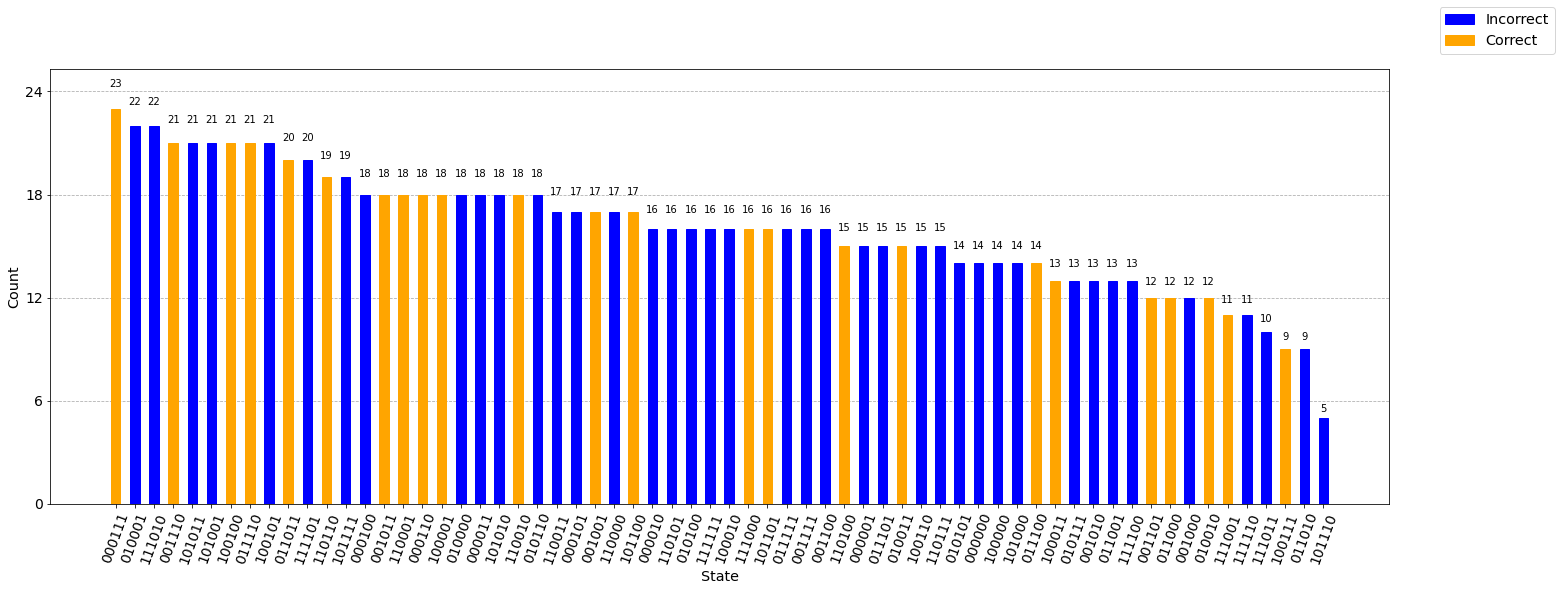

In [ ]:
grover = Grover(iterations = 0, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

###### **Solution**

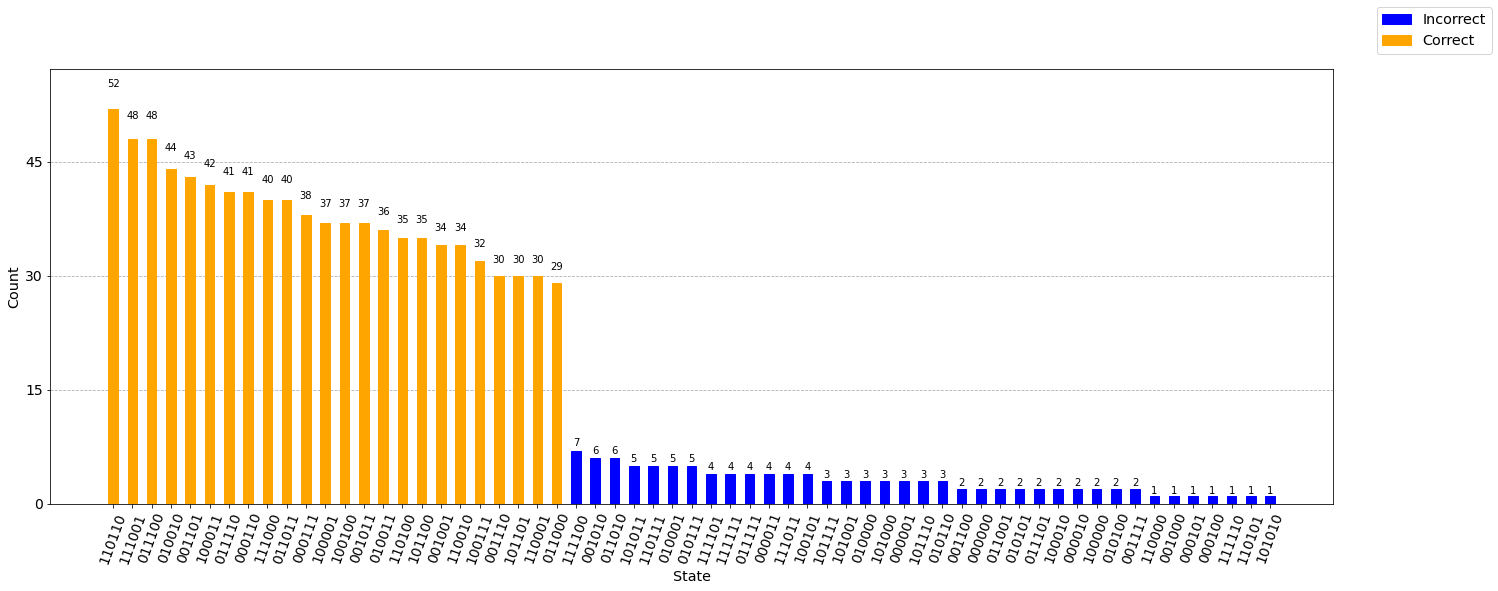

In [ ]:
grover = Grover(iterations = 7, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

#### **Problem #2.1.6**

Now, solve the problem of coloring 4 countries such that the first 2 border each other and the second two border each other, but there is water between them:


**Country 0 | Country 1 ~ ~ water ~ ~ Country 2 | Country 3**


<br>

This means that:
* Countries 0 and 1 must be colored differently.
* Countries 2 and 3 must be colored differently.
* Any other pair of countries can be colored the same or differently since they do not border each other.

<br>

**Question**: Is this problem over- or under- constrained (or is there exactly one solution)?

##### **1. Define the problem.**

Complete the code below to define this specific problem.

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
check_qubits = [8, # COMPLETE THIS LINE
output_qubit = # COMPLETE THIS LINE
disagree_list = [ [[0, 1], [2, 3]],
                  # COMPLETE THIS CODE
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

###### **Solution**

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
check_qubits = [8, 9]
output_qubit = 10
disagree_list = [[[0, 1], [2, 3]],
                 [[4, 5], [6, 7]]
                ]



# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

##### **2. Solve the problem.**

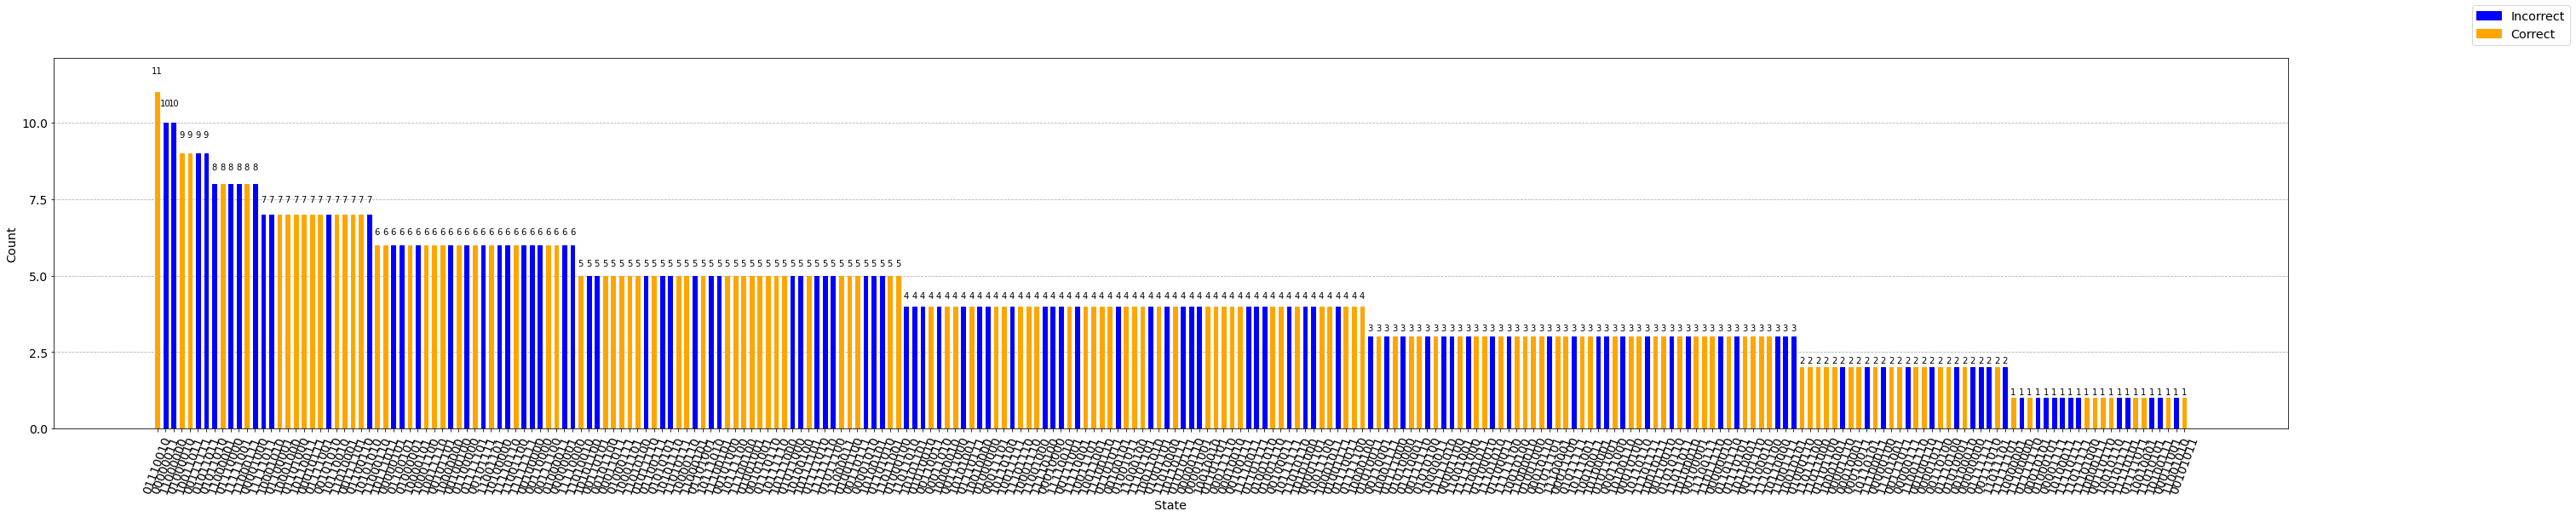

In [ ]:
grover = Grover(iterations = 0, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

###### **Solution**

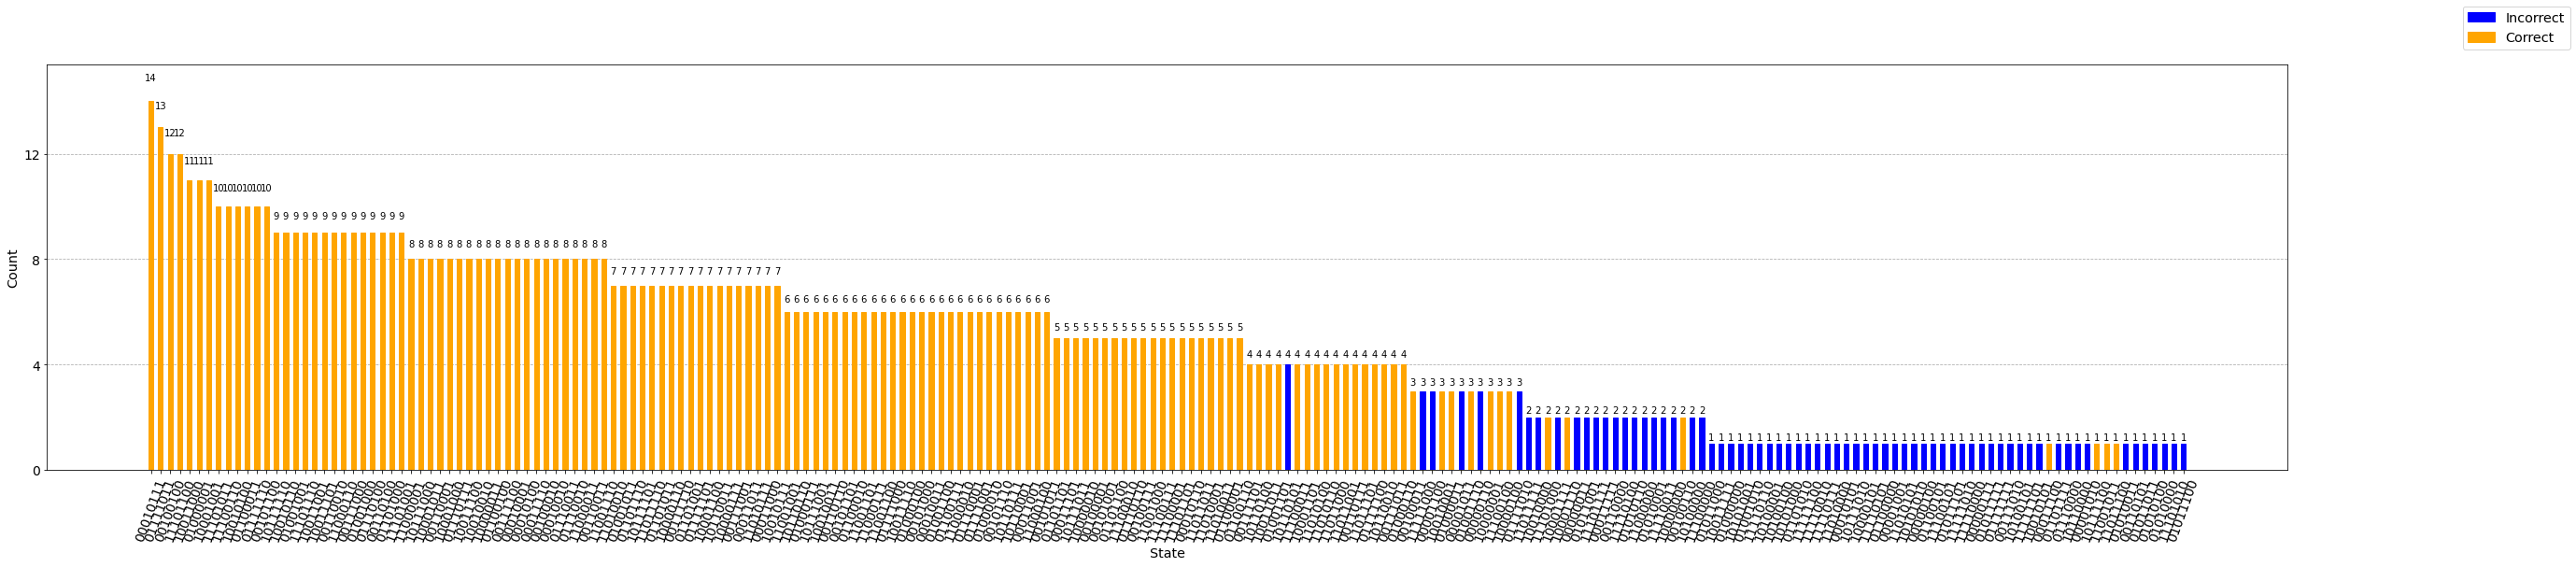

In [ ]:
grover = Grover(iterations = 3, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

#### **Problem #2.1.7**

Now, solve the problem of coloring 4 countries such that the first 3 are in the same arrangement as Problem #2.1.5, but are now bordered on all sides by the last country:

**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font size="6">Country 3</font>**

**<font size="6">Country 3</font> &ensp;| Country 0 | Country 1 | &ensp;<font size="6">Country 3</font>**

**&ensp;&ensp;&ensp;<font size="6">Country 3</font>&ensp;&ensp;&ensp;| Country 2 | &ensp;&ensp;&ensp;<font size="6">Country 3</font>**

**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font size="6">Country 3</font>**


<br>

This means that:
* Countries 0 and 1 must be colored differently.
* Countries 0 and 2 must be colored differently.
* Countries 0 and 3 must be colored differently.
* Countries 1 and 2 must be colored differently.
* Countries 1 and 3 must be colored differently.
* Countries 2 and 3 must be colored differently.
* Any other pair of countries can be colored the same or differently since they do not border each other.

<br>


**NOTE**: Be patient! This is a large problem and may take several minutes to run.

##### **1. Define the problem.**

Complete the code below to define this specific problem.

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
check_qubits = [8, # COMPLETE THIS LINE
output_qubit = # COMPLETE THIS LINE
disagree_list = [ [[0, 1], [2, 3]],
                  # COMPLETE THIS CODE
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

###### **Solution**

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
check_qubits = [8, 9, 10, 11, 12, 13]
output_qubit = 14
disagree_list = [[[0, 1], [2, 3]],
                 [[0, 1], [4, 5]],
                 [[0, 1], [6, 7]],
                 [[2, 3], [4, 5]],
                 [[2, 3], [6, 7]],
                 [[4, 5], [6, 7]]
                ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

##### **2. Solve the problem.**

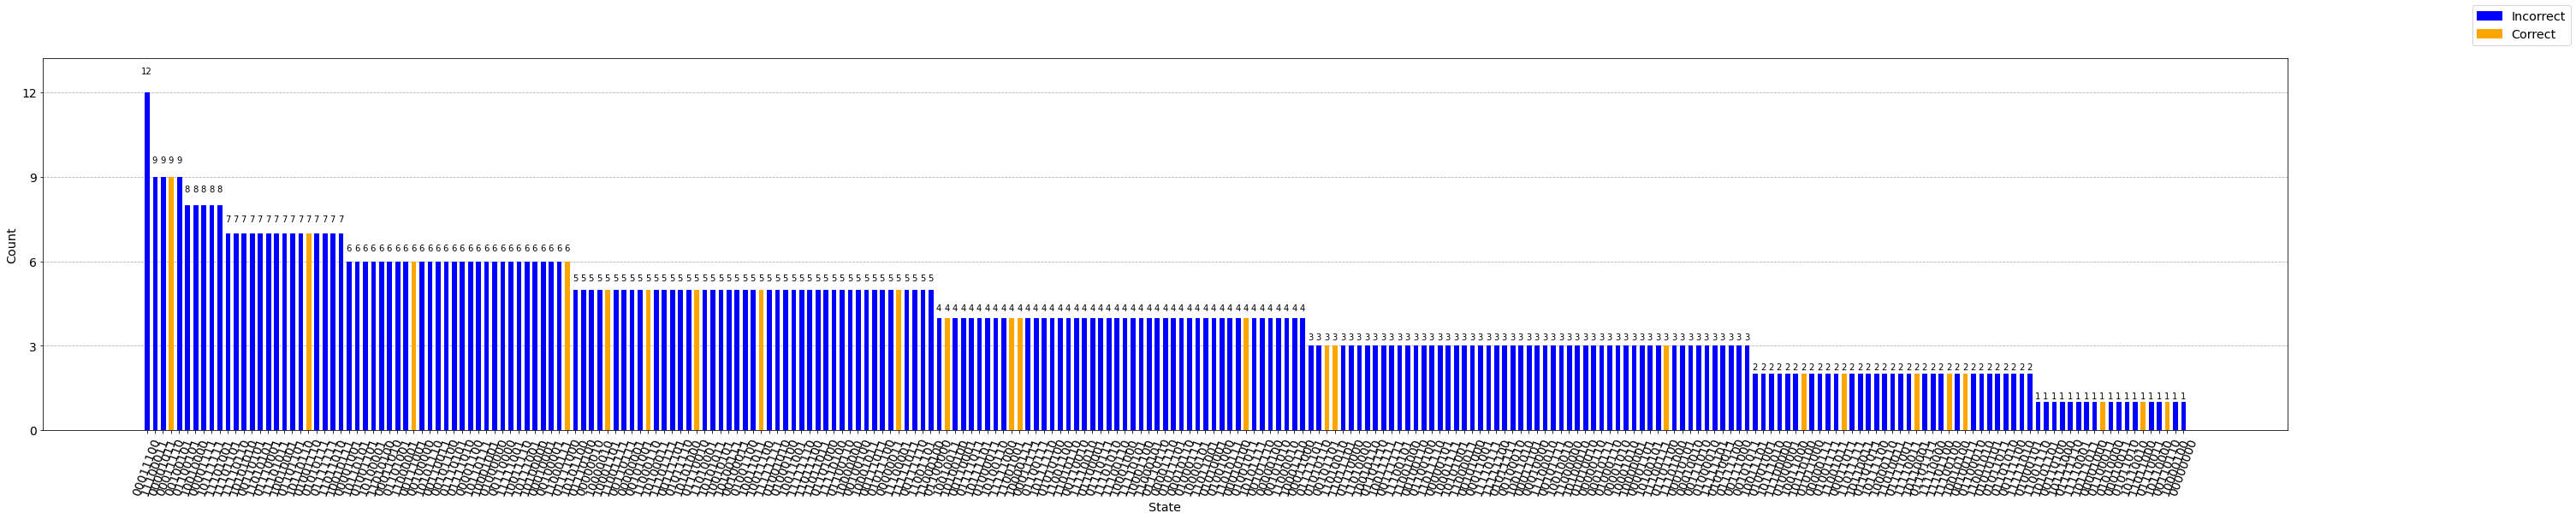

In [ ]:
grover = Grover(iterations = 0, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

###### **Solution**

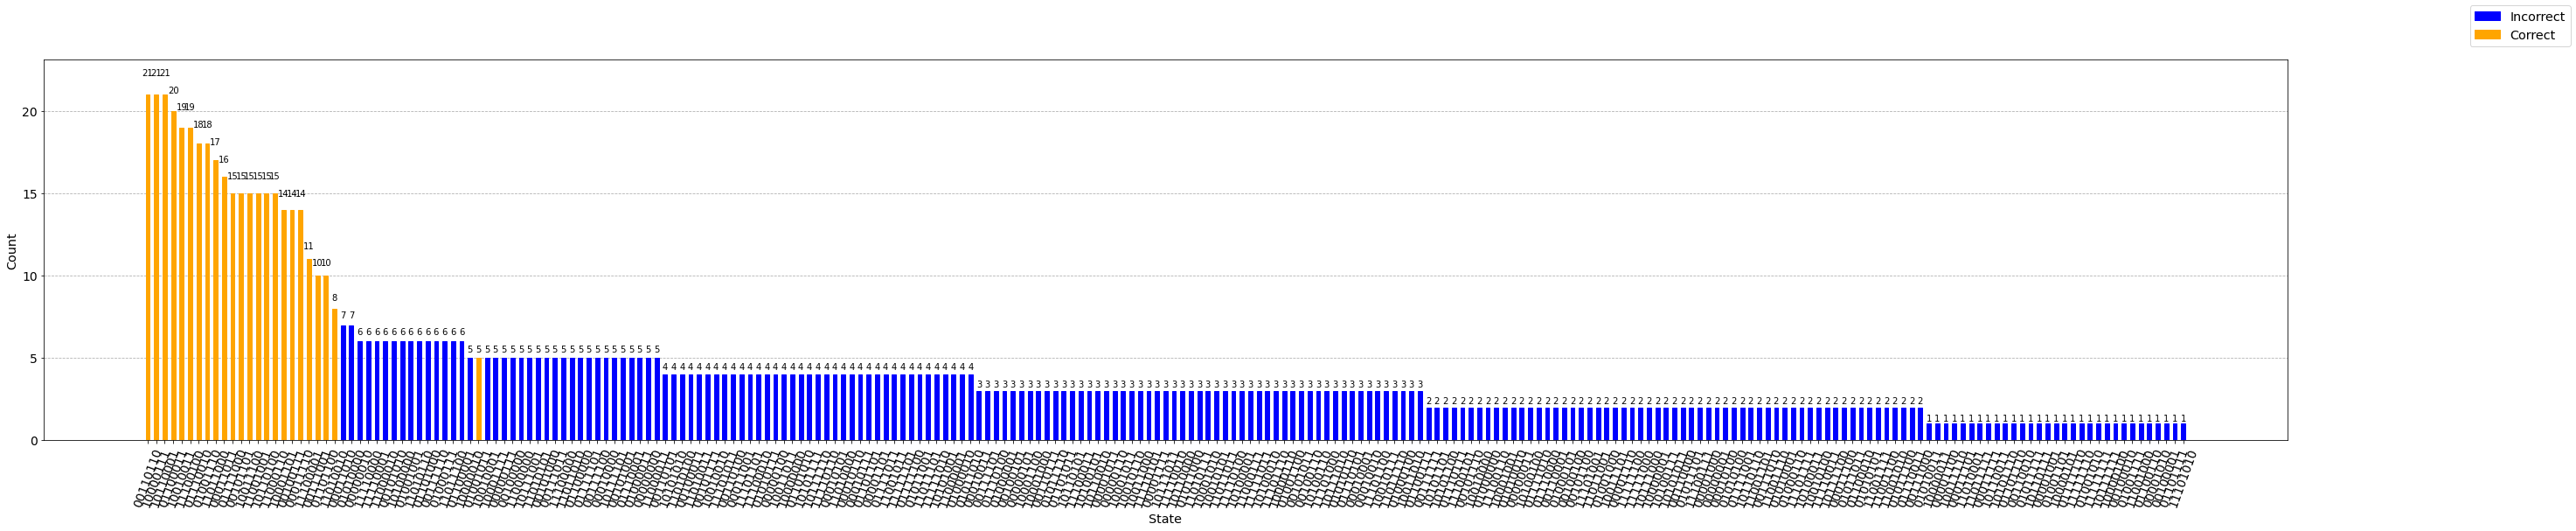

In [ ]:
# 1: 2 m
grover = Grover(iterations = 1, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

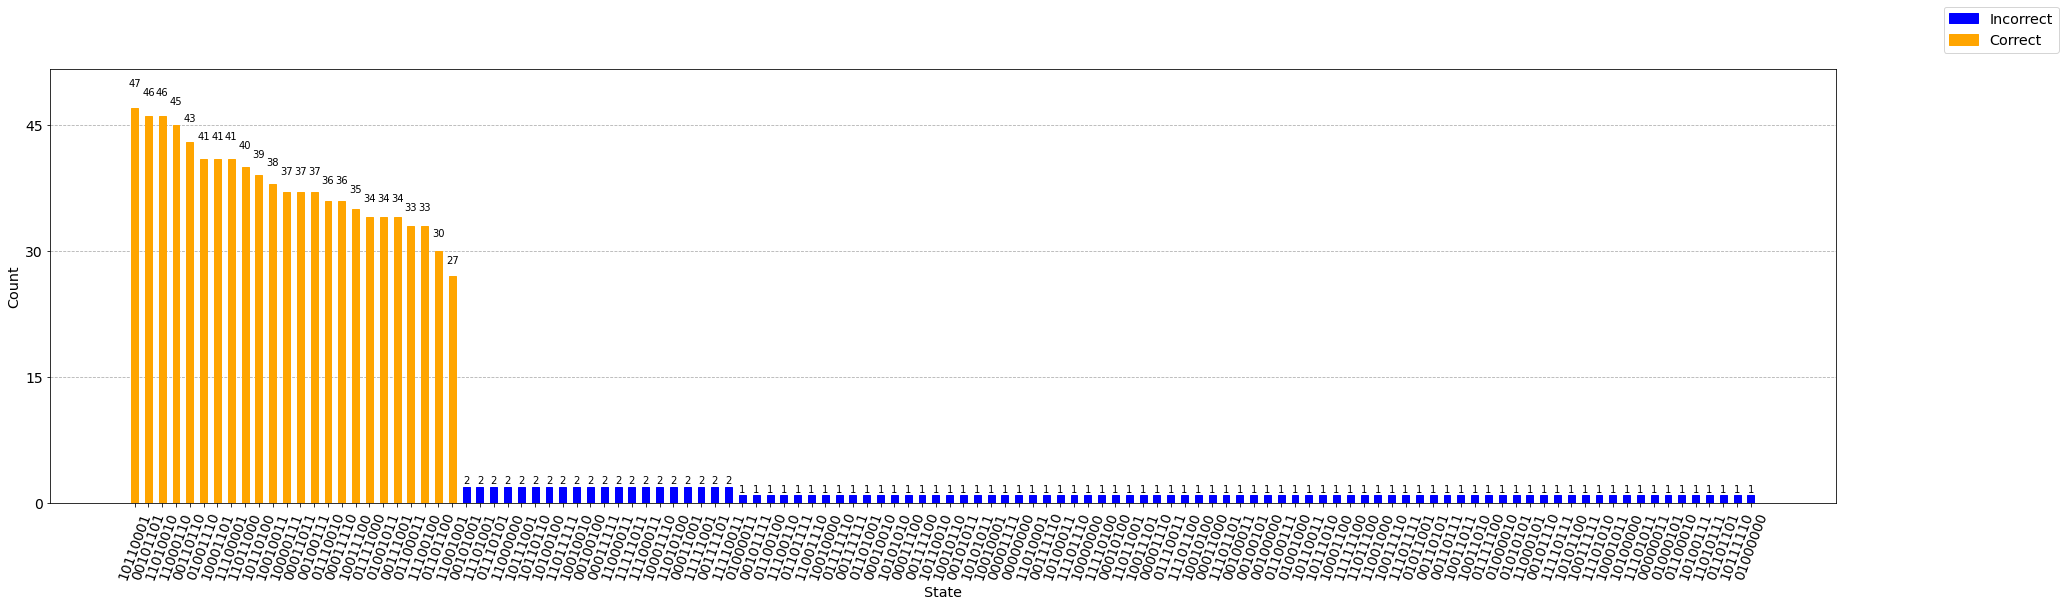

In [ ]:
# 2: 4 m
grover = Grover(iterations = 2, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

#### **Hitting Limits**

The code above should be able to solve this problem within just 1 - 2 iterations. However, it takes almost 2 minutes per iteration. For computers, this is an unacceptably long time, particularly given that this problem is much smaller than many of the applications we might be interested in (most directly, imagine trying to color a map of Africa or the world)!


It is common in scientific research to first find something that works, just so you know it can be done, and then find ways to optimize (improve) it. Furthermore, there are often many ways to optimize an algorithm and choosing how much time and energy to spend on the different ways largely depends on what you need to accomplish in practice.

In Part 2.2, we will explore one way to optimize this code, specifically making it run faster. We can verify that it is faster by trying it out on the exact same problem as above.

---
### **Part 2.2: A Faster Approach**
---

In this section, we will optimize our implementation of Grover's algorithm for the 4-coloring problem by determining one of the "bottlenecks" (parts that are slowing everything down) and attempting to improve upon it.

#### **Problem #2.2.1**

To start, we need to understand what is actually slowing this code down, called a [bottleneck](https://en.wikipedia.org/wiki/Bottleneck_(software)). In other words, we need to diagnose the problem. 

**Draw the prep and oracle circuits from the problem above to see what we are working with.**

In [ ]:
# DRAW THE PREP CIRCUIT

In [ ]:
# DRAW THE ORACLE CIRCUIT

##### **Solution** 

In [ ]:
prep.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ H ├
     ├───┤
q_6: ┤ H ├
     ├───┤
q_7: ┤ H ├
     └───┘

In [ ]:
oracle.draw()

»
 q_0: ───────■────────────────────────■────────────────────────■────────────»
             │                        │                        │            »
 q_1: ───────┼────■───────────────────┼────■───────────────────┼────■───────»
             │    │                   │    │                   │    │       »
 q_2: ───────┼────┼─────────■─────────┼────┼───────────────────┼────┼────■──»
             │    │         │         │    │                   │    │    │  »
 q_3: ───────┼────┼─────────┼────■────┼────┼───────────────────┼────┼────┼──»
             │    │         │    │    │    │                   │    │    │  »
 q_4: ───────┼────┼─────────┼────┼────┼────┼─────────■─────────┼────┼────┼──»
             │    │         │    │    │    │         │         │    │    │  »
 q_5: ───────┼────┼─────────┼────┼────┼────┼─────────┼────■────┼────┼────┼──»
             │    │         │    │    │    │         │    │    │    │    │  »
 q_6: ───────┼────┼─────────┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
             │    │         │    │    │    │         │    │    │    │    │  »
 q_7: ───────┼────┼─────────┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
             │    │         │    │    │    │         │    │    │    │    │  »
 q_8: ───────┼────┼─────────┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
             │    │         │    │    │    │         │    │    │    │    │  »
 q_9: ───────┼────┼─────────┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
             │    │         │    │    │    │         │    │    │    │    │  »
q_10: ───────┼────┼─────────┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
             │    │         │    │    │    │         │    │    │    │    │  »
q_11: ───────┼────┼─────────┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
             │    │         │    │    │    │         │    │    │    │    │  »
q_12: ───────┼────┼─────────┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
             │    │         │    │    │    │         │    │    │    │    │  »
q_13: ───────┼────┼─────────┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
      ┌───┐  │    │  ┌───┐  │    │    │    │         │    │    │    │    │  »
q_14: ┤ X ├──┼────┼──┤ H ├──┼────┼────┼────┼─────────┼────┼────┼────┼────┼──»
      └───┘┌─┴─┐  │  └───┘┌─┴─┐  │    │    │  ┌───┐  │    │    │    │    │  »
  15: ─────┤ X ├──┼───────┤ X ├──┼────┼────┼──┤ X ├──┼────┼────┼────┼────┼──»
           └───┘┌─┴─┐     └───┘┌─┴─┐  │    │  ├───┤  │    │    │    │    │  »
  16: ──────────┤ X ├──────────┤ X ├──┼────┼──┤ X ├──┼────┼────┼────┼────┼──»
                └───┘          └───┘┌─┴─┐  │  └───┘┌─┴─┐  │    │    │    │  »
  17: ──────────────────────────────┤ X ├──┼───────┤ X ├──┼────┼────┼────┼──»
                                    └───┘┌─┴─┐     └───┘┌─┴─┐  │    │    │  »
  18: ───────────────────────────────────┤ X ├──────────┤ X ├──┼────┼────┼──»
                                         └───┘          └───┘┌─┴─┐  │    │  »
  19: ───────────────────────────────────────────────────────┤ X ├──┼────┼──»
                                                             └───┘┌─┴─┐  │  »
  20: ────────────────────────────────────────────────────────────┤ X ├──┼──»
                                                                  └───┘┌─┴─┐»
  21: ─────────────────────────────────────────────────────────────────┤ X ├»
                                                                       └───┘»
  22: ──────────────────────────────────────────────────────────────────────»
                                                                            »
  23: ──────────────────────────────────────────────────────────────────────»
                                                                            »
  24: ──────────────────────────────────────────────────────────────────────»
                                                                            »
  25: ──────────────────────────────────────────────────────────────────────»
                    

#### **Problem #2.2.2**

The particular way we will optimize the oracle here is to eliminate the need for ancilla qubits as they effectively double the size and complexity of the problem. For instance, the last problem from Part 2.1 had 12 ancilla qubits on top of the 14 "core" qubits.

<br>

To accomplish this, we will approach the disagreement checks completely differently. The logic we used before was very generallly encoding the idea of pairs of qubits disagreeing. However, with 4 colors it turns out that there are only ever 4 cases where all 4 qubits agree with each other. Here are the 4 cases explicitly:

11 11

01 01

10 10

00 00

All (12) other states are acceptable! So, we've been using general logic to eliminate 4/16 or just 1/4 of the possibilities. Instead, let us specifically target these states as follows:

1. Check if the qubits are in the 11 11 state.
2. Check if the qubits are in the 01 01 state.
3. Check if the qubits are in the 10 10 state.
4. Check if the qubits are in the 00 00 state.
5. If none of these states have been found, flip the output qubit.

<br>

**Run the code below to define variables that will be used throughout this problem.**

In [ ]:
qc = QuantumCircuit(5)
qubits_a = [0, 1]
qubits_b = [2, 3]
check_qubit = 4

##### **1. Check if the qubits are in the 11 11 state.**

To get started, the code for this has been provided for you. Consider why this works to check if $q_0 q_1 q_2 q_3 = 1111$.

In [ ]:
qc.mct(qubits_a + qubits_b, check_qubit)

qc.barrier()
qc.draw()

░ 
q_0: ──■───░─
       │   ░ 
q_1: ──■───░─
       │   ░ 
q_2: ──■───░─
       │   ░ 
q_3: ──■───░─
     ┌─┴─┐ ░ 
q_4: ┤ X ├─░─
     └───┘ ░

##### **2. Check if the qubits are in the 01 01 state.**

This is a matter of modifying the approach above by flipping the appropriate qubits AND making sure that you undo any flips *right* after checking so that they are ready to be checked for the next case.

In [ ]:
qc.mct(qubits_a + qubits_b, check_qubit)

qc.barrier()
qc.draw()

###### **Solution**

In [ ]:
qc.x(qubits_a[0])
qc.x(qubits_b[0])
qc.mct(qubits_a + qubits_b, check_qubit)
qc.x(qubits_a[0])
qc.x(qubits_b[0])

qc.barrier()
qc.draw()

░ ┌───┐     ┌───┐ ░ 
q_0: ──■───░─┤ X ├──■──┤ X ├─░─
       │   ░ └───┘  │  └───┘ ░ 
q_1: ──■───░────────■────────░─
       │   ░ ┌───┐  │  ┌───┐ ░ 
q_2: ──■───░─┤ X ├──■──┤ X ├─░─
       │   ░ └───┘  │  └───┘ ░ 
q_3: ──■───░────────■────────░─
     ┌─┴─┐ ░      ┌─┴─┐      ░ 
q_4: ┤ X ├─░──────┤ X ├──────░─
     └───┘ ░      └───┘      ░

##### **3. Check if the qubits are in the 10 10 state.**

In [ ]:
qc.mct(qubits_a + qubits_b, check_qubit)

qc.barrier()
qc.draw()

###### **Solution**

In [ ]:
qc.x(qubits_a[1])
qc.x(qubits_b[1])
qc.mct(qubits_a + qubits_b, check_qubit)
qc.x(qubits_a[1])
qc.x(qubits_b[1])

qc.barrier()
qc.draw()

░ ┌───┐     ┌───┐ ░                 ░ 
q_0: ──■───░─┤ X ├──■──┤ X ├─░────────■────────░─
       │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ 
q_1: ──■───░────────■────────░─┤ X ├──■──┤ X ├─░─
       │   ░ ┌───┐  │  ┌───┐ ░ └───┘  │  └───┘ ░ 
q_2: ──■───░─┤ X ├──■──┤ X ├─░────────■────────░─
       │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ 
q_3: ──■───░────────■────────░─┤ X ├──■──┤ X ├─░─
     ┌─┴─┐ ░      ┌─┴─┐      ░ └───┘┌─┴─┐└───┘ ░ 
q_4: ┤ X ├─░──────┤ X ├──────░──────┤ X ├──────░─
     └───┘ ░      └───┘      ░      └───┘      ░

##### **4. Check if the qubits are in the 00 00 state.**

In [ ]:
qc.mct(qubits_a + qubits_b, check_qubit)

qc.barrier()
qc.draw()

###### **Solution**

In [ ]:
qc.x(qubits_a[0])
qc.x(qubits_b[0])
qc.x(qubits_a[1])
qc.x(qubits_b[1])
qc.mct(qubits_a + qubits_b, check_qubit)
qc.x(qubits_a[0])
qc.x(qubits_b[0])
qc.x(qubits_a[1])
qc.x(qubits_b[1])

qc.barrier()
qc.draw()

░ ┌───┐     ┌───┐ ░                 ░ ┌───┐     ┌───┐ ░ 
q_0: ──■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░─
       │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │  ├───┤ ░ 
q_1: ──■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─
       │   ░ ┌───┐  │  ┌───┐ ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░ 
q_2: ──■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░─
       │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │  ├───┤ ░ 
q_3: ──■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─
     ┌─┴─┐ ░      ┌─┴─┐      ░ └───┘┌─┴─┐└───┘ ░ └───┘┌─┴─┐└───┘ ░ 
q_4: ┤ X ├─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░─
     └───┘ ░      └───┘      ░      └───┘      ░      └───┘      ░

##### **5. If none of these states have been found, flip the output qubit.**

Now all 4 states have been checked and $q_4$ will be 1 if any of them have been found. However, we want to flip this logic so that $q_4$ is 1 if *none* of them have been found. Apply the necessary gate(s) below to accomplish this.

In [ ]:
# COMPLETE THIS CODE

qc.draw()

###### **Solution**

In [ ]:
qc.x(check_qubit)

qc.draw()

░ ┌───┐     ┌───┐ ░                 ░ ┌───┐     ┌───┐ ░      
q_0: ──■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░──────
       │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │  ├───┤ ░      
q_1: ──■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░──────
       │   ░ ┌───┐  │  ┌───┐ ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░      
q_2: ──■───░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░──────
       │   ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ├───┤  │  ├───┤ ░      
q_3: ──■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░──────
     ┌─┴─┐ ░      ┌─┴─┐      ░ └───┘┌─┴─┐└───┘ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐
q_4: ┤ X ├─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░─┤ X ├
     └───┘ ░      └───┘      ░      └───┘      ░      └───┘      ░ └───┘

#### **Problem #2.2.3**

Now, complete the code below by filling it in with the parts you developed in Problem #2.2.2. Unlike in Part 2.1, we do not need to return anything from this function.

<br>

**IMPORTANT NOTE**: Qiskit does not cross barriers when trying to find optimal ways to simulate or compile quantum circuits. So, to make this code as efficient as possible **remove any calls to `qc.barrier()` or `qc.draw()`**.

In [ ]:
def disagree_check_4c(qc, qubits_a, qubits_b, check_qubit):

  # 1. Check if the qubits are in the 11 11 state.
  # COMPLETE THIS CODE

  # 2. Check if the qubits are in the 01 01 state.
  # COMPLETE THIS CODE

  # 3. Check if the qubits are in the 10 10 state.
  # COMPLETE THIS CODE

  # 4. Check if the qubits are in the 00 00 state.
  # COMPLETE THIS CODE

  # 5. If none of these states have been found, flip the output qubit.
  # COMPLETE THIS CODE

##### **Solution**

In [ ]:
def disagree_check_4c(qc, qubits_a, qubits_b, check_qubit):

  # 1. Check if the qubits are in the 11 11 state.
  qc.mct(qubits_a + qubits_b, check_qubit)

  # 2. Check if the qubits are in the 01 01 state.
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])

  # 3. Check if the qubits are in the 10 10 state.
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])

  # 4. Check if the qubits are in the 00 00 state.
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])

  # 5. If none of these states have been found, flip the output qubit.
  qc.x(check_qubit)

#### **Problem #2.2.4**

Lastly, we need to define the function that *undoes* this operation, `undo_disagree_check_4c(...)`.

**Complete the code below by applying the gates from `disagree_check_4c(...)` in the opposite order.**

In [ ]:
def undo_disagree_check_4c(qc, qubits_a, qubits_b, check_qubit):

  # 5. UNDO If none of these states have been found, flip the output qubit.
  # COMPLETE THIS CODE

  # 4. UNDO Check if the qubits are in the 00 00 state.
  # COMPLETE THIS CODE

  # 3. UNDO Check if the qubits are in the 10 10 state.
  # COMPLETE THIS CODE

  # 2. UNDO Check if the qubits are in the 01 01 state.
  # COMPLETE THIS CODE

  # 1. UNDO Check if the qubits are in the 11 11 state.
  # COMPLETE THIS CODE

##### **Solution**

**NOTE**: It is vital that the X gates and CX & MCT gates are reversed, as well as the order of steps. However, technically the CX gates within each step commute with each other since `qubits_a` and `qubits_b` are completely different qubits.

In [ ]:
def undo_disagree_check_4c(qc, qubits_a, qubits_b, check_qubit):

  # 5. UNDO If none of these states have been found, flip the output qubit.
  qc.x(check_qubit)

  # 4. UNDO Check if the qubits are in the 00 00 state.
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])

  # 3. UNDO Check if the qubits are in the 10 10 state.
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])

  # 2. UNDO Check if the qubits are in the 01 01 state.
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])

  # 1. UNDO Check if the qubits are in the 11 11 state.
  qc.mct(qubits_a + qubits_b, check_qubit)

#### **Updating the Oracle Function**

Now that we are not using ancilla qubits, we need to slightly update the oracle function.

**Run the code below to update the oracle function.**

In [ ]:
def graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit):

  # 1. Initializing a quantum circuit with the output bit in the |−⟩ state.
  num_vars = len(variable_qubits)
  num_checks = len(check_qubits)
  num_outputs = 1

  oracle = QuantumCircuit(num_vars + num_checks + num_outputs)
  oracle.x(output_qubit)
  oracle.h(output_qubit)


  # 2. Checking if each pair of qubits in a given list, disagree_list, disagree with each other.
  for i in range(len(disagree_list)):
    disagree_check_4c(oracle,
                      disagree_list[i][0], 
                      disagree_list[i][1], 
                      check_qubits[i])

  
  # 3. Flip the output bit if all disagreements are satisfied.
  oracle.mct(check_qubits, output_qubit)


  # 4. Resetting all the extra qubits for the next iteration.
  # Need to include the specific ancillas used for each check
  for i in range(len(disagree_list)):
    undo_disagree_check_4c(oracle, 
                           disagree_list[i][0], 
                           disagree_list[i][1], 
                           check_qubits[i])

  
  return oracle

#### **Problem #2.2.5**

Now, solve the problem from the last problem of Part 2.1.

As a reminder, it is the problem of coloring 4 countries such that the first 3 are in the same arrangement as Problem #2.1.5, but are now bordered on all sides by the last country:

**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font size="6">Country 3</font>**

**<font size="6">Country 3</font> &ensp;| Country 0 | Country 1 | &ensp;<font size="6">Country 3</font>**

**&ensp;&ensp;&ensp;<font size="6">Country 3</font>&ensp;&ensp;&ensp;| Country 2 | &ensp;&ensp;&ensp;<font size="6">Country 3</font>**

**&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font size="6">Country 3</font>**


<br>

This means that:
* Countries 0 and 1 must be colored differently.
* Countries 0 and 2 must be colored differently.
* Countries 0 and 3 must be colored differently.
* Countries 1 and 2 must be colored differently.
* Countries 1 and 3 must be colored differently.
* Countries 2 and 3 must be colored differently.
* Any other pair of countries can be colored the same or differently since they do not border each other.

##### **1. Define the problem.**

Complete the code below to define this specific problem.

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
check_qubits = [8, # COMPLETE THIS LINE
output_qubit = # COMPLETE THIS LINE
disagree_list = [ [[0, 1], [2, 3]],
                  # COMPLETE THIS CODE
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

###### **Solution**

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
check_qubits = [8, 9, 10, 11, 12, 13]
output_qubit = 14
disagree_list = [[[0, 1], [2, 3]],
                 [[0, 1], [4, 5]],
                 [[0, 1], [6, 7]],
                 [[2, 3], [4, 5]],
                 [[2, 3], [6, 7]],
                 [[4, 5], [6, 7]]
                ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

##### **2. Solve the problem.**

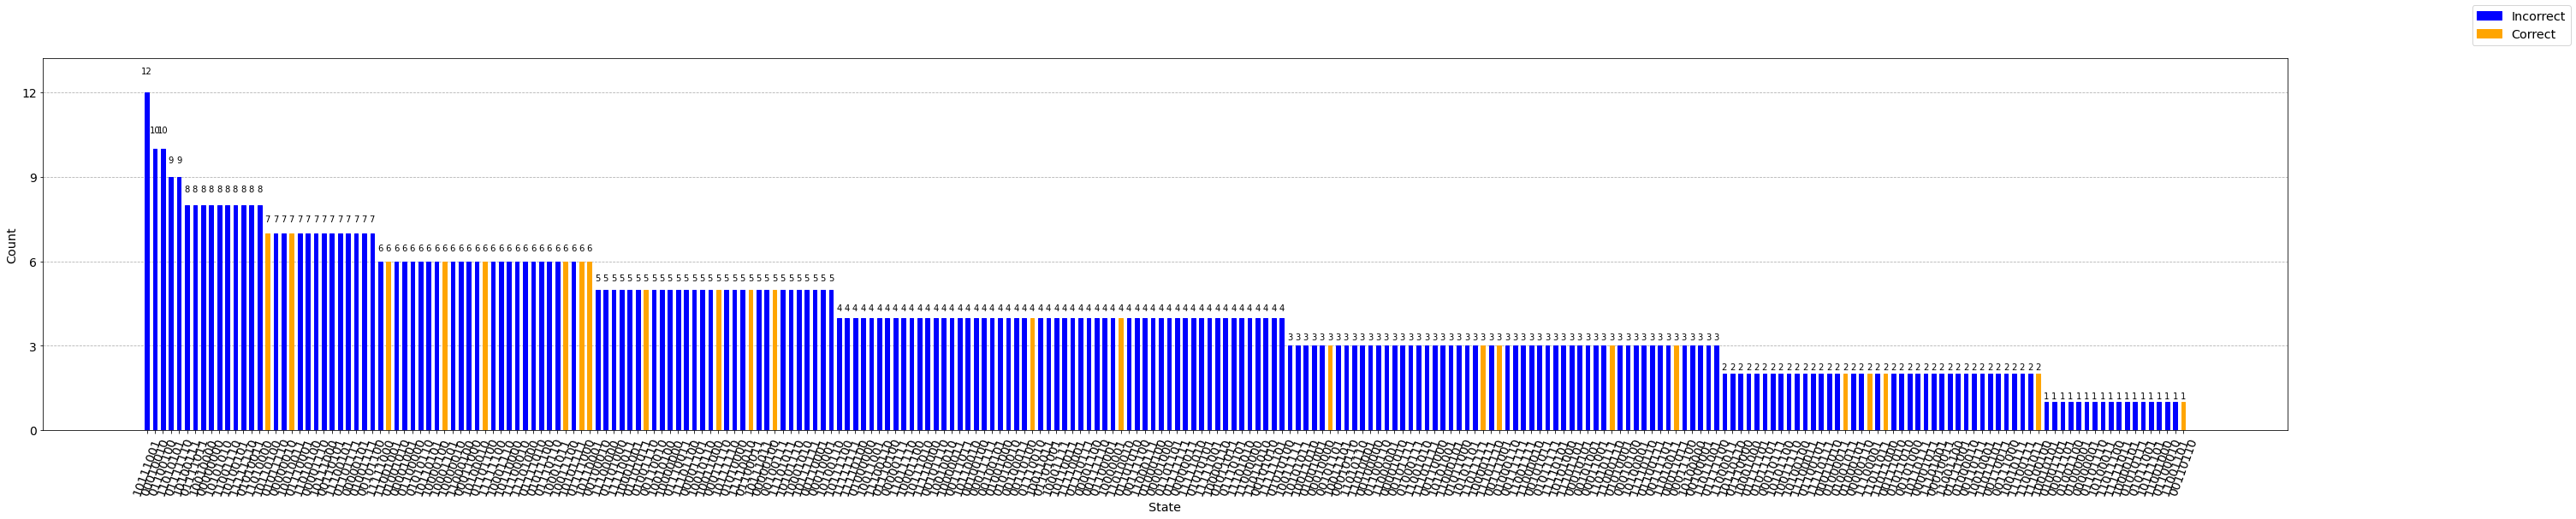

In [ ]:
grover = Grover(iterations = 0, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

###### **Solution**

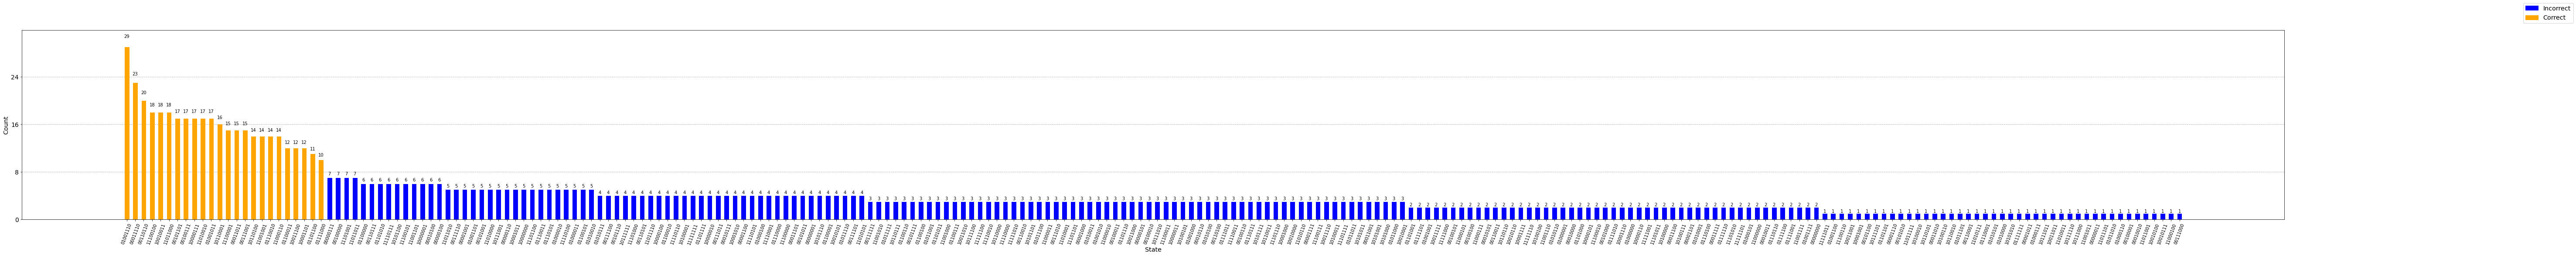

In [ ]:
# 1: < 4 s
grover = Grover(iterations = 1, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

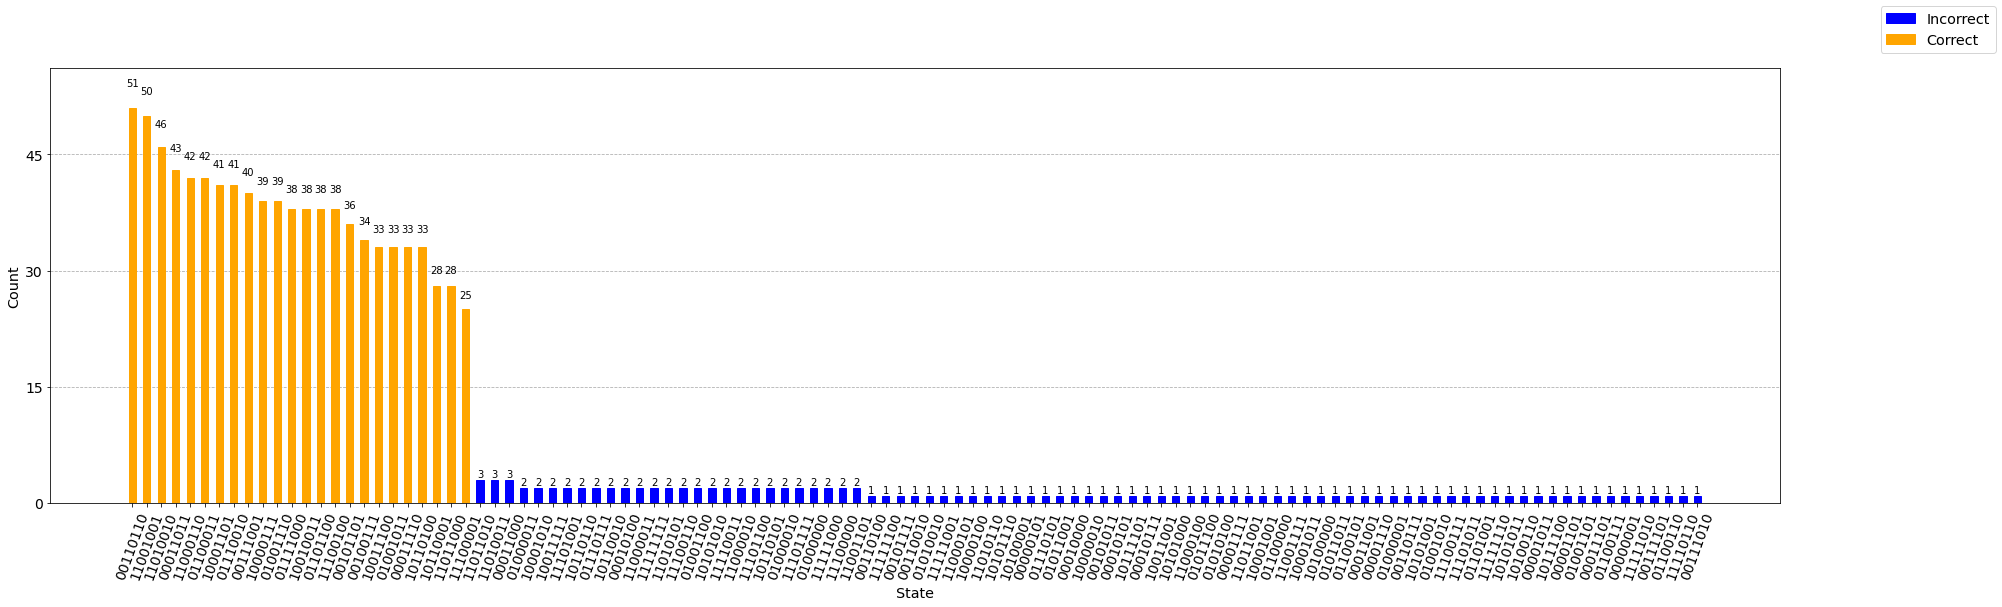

In [ ]:
# 2: < 10 s
grover = Grover(iterations = 2, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

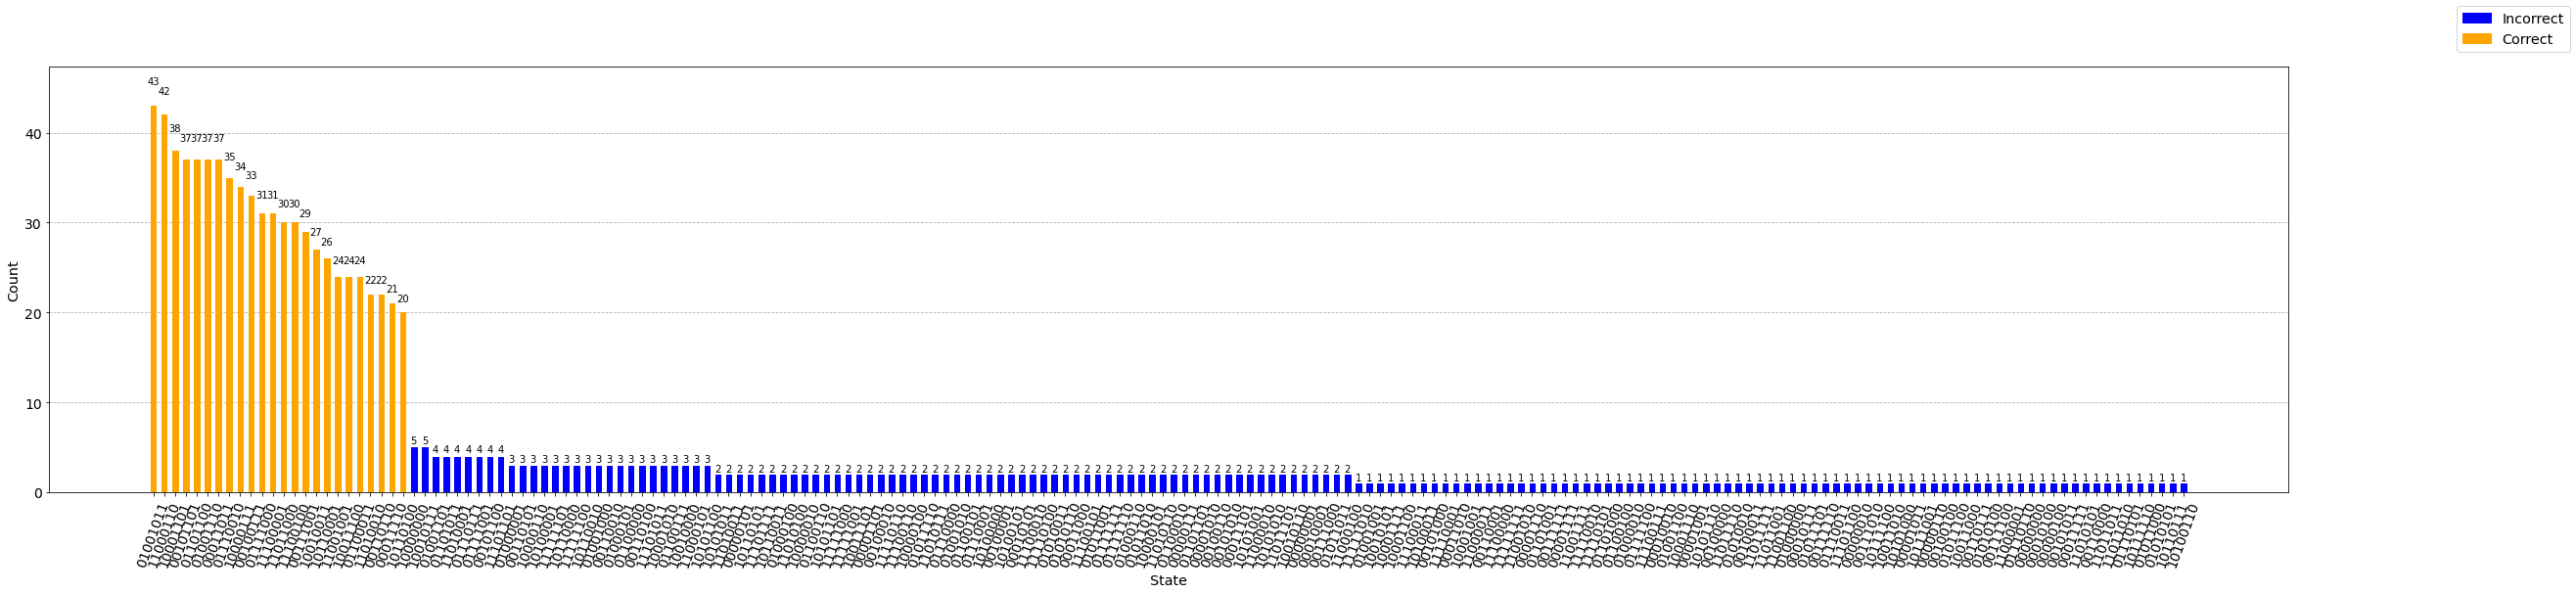

In [ ]:
# 3: < 10 s
grover = Grover(iterations = 3, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

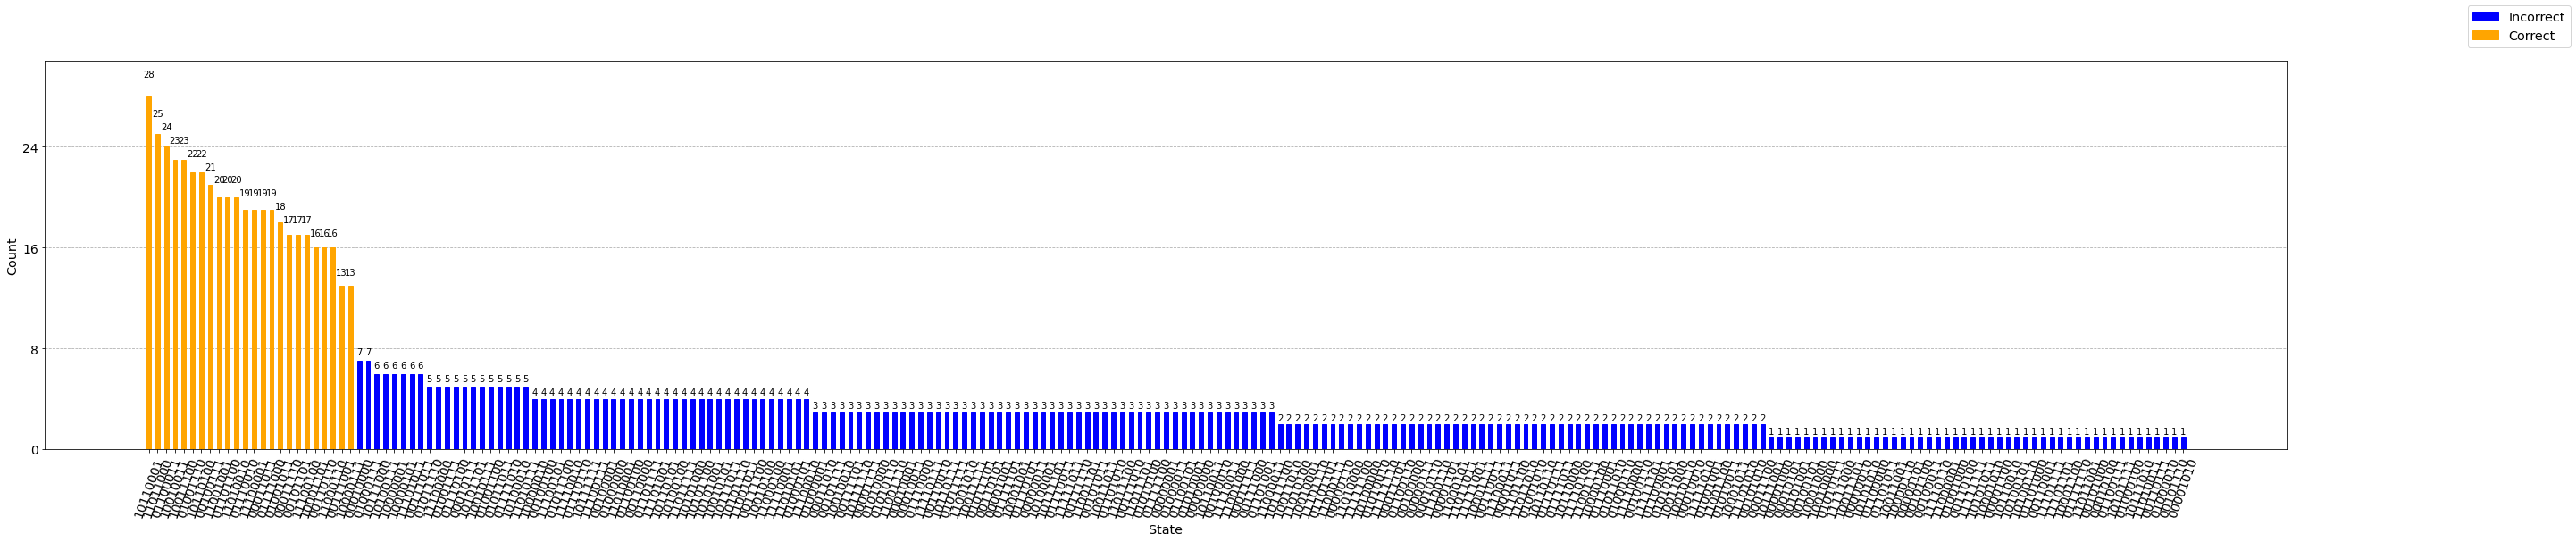

In [ ]:
# 4: < 10 s
grover = Grover(iterations = 4, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

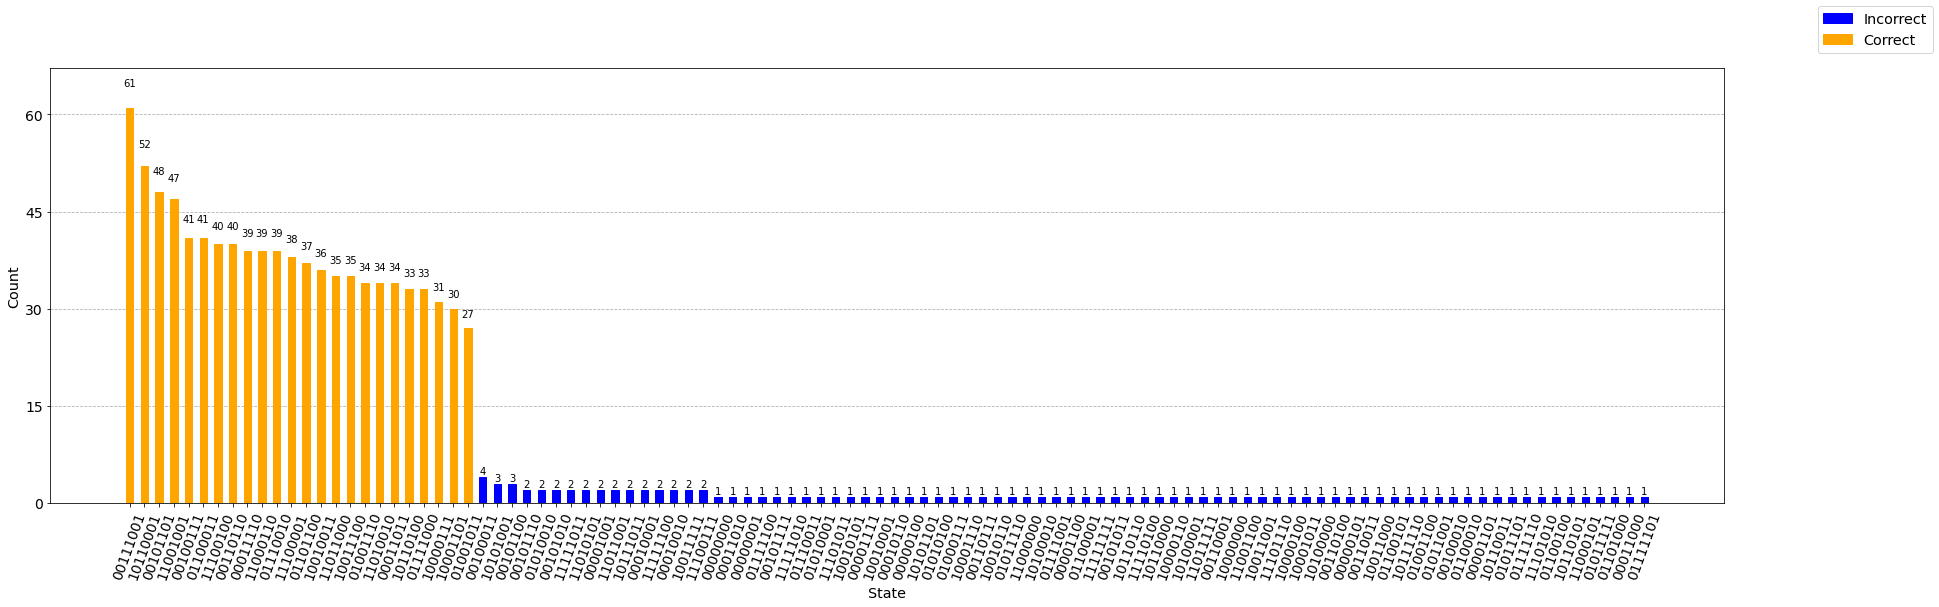

In [ ]:
# 15: < 10 s
grover = Grover(iterations = 15, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

---
### **Part 2.3: Beyond Coloring**
---

Now that we have found a faster way to solve the 4 Coloring problem, let's explore applications of this algorithm beyond the Coloring problem itself. In particular, we will look at **scheduling problems** framed as follows:

> Given a schedule of flying routes and $k$ airplanes that are available to fly, create an assignment of airplanes to flights and timeslots.

<br>


For example the following table shows $k = 4$ planes and 4 total routes to be assigned a plane:

| **Time \| Route** | **Boston to DC (2 hours)** | **DC to Los Angeles (6 hours)** |
|------------------|----------------------------|-------------------------------------|
| **9 am**         | Route 0    | Route 1             |
| **12 pm**        | Route 2    | Route 3             |


<br>

Two possible solutions to this specific problem are:

| **Time \| Route** | **Boston to DC (2 hours)** | **DC to Los Angeles (6 hours)** |
|------------------|----------------------------|-------------------------------------|
| **9 am**         | Airplane 0                 | Airplane 1                          |
| **12 pm**        | Airplane 2                 | Airplane 3                          |


<br>


| **Time \| Route** | **Boston to DC (2 hours)** | **DC to Los Angeles (6 hours)** |
|------------------|----------------------------|-------------------------------------|
| **9 am**         | Airplane 0                 | Airplane 1                          |
| **12 pm**        | Airplane 2                 | Airplane 0                          |



<br>

Most importantly, we can use Graph Coloring to solve this problem! This just requires thinking of the problem as follows:
* Instead of $k$ colors, we have $k$ airplanes.
* Instead of borders, we have restrictions based on the fact that each airplane can only fly one route at a time. In particular, this means:
  * Any airplanes taking off at the same time must be different.
  * An airplane can be used for multiple routes, but only if it has landed after any previous flights. So, the takeoff times and route times must be considered.

#### **Problem #2.3.1**

Let's solve the problem given above and restated here:

| **Time \| Route** | **Boston to DC (2 hours)** | **DC to Los Angeles (6 hours)** |
|------------------|----------------------------|-------------------------------------|
| **9 am**         | Route 0    | Route 1             |
| **12 pm**        | Route 2    | Route 3             |

<br>

Since there are 4 possible planes to use, this is fundamentally a 4 Coloring Problem. So, we can use our Grover solver from above.

The key to doing this is encoding the restrictions correctly:
* Route 0 and Route 1 must use different planes since they take off at the same time.
* Route 0 and Route 2 must use different planes since the plane flying Route 0 will not have time to return to Boston for Route 2.
* Route 1 and Route 2 must use different planes since the plane flying Route 1 will still be in the air when Route 2 is meant to start.
* Route 1 and Route 3 must use different planes for the same reason.
* Route 2 and 3 must use different planes since they take off at the same time.
* The only acceptable reuse of a plane is for Route 0 and 3 since the plane flying Route 0 will have been able to land in DC before Route 3 takes off.

##### **1. Define the problem.**

Complete the code below to define this specific problem.

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
check_qubits = [8, # COMPLETE THIS LINE
output_qubit = # COMPLETE THIS LINE
disagree_list = [ [[0, 1], [2, 3]],
                  # COMPLETE THIS CODE
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

###### **Solution**

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7]
check_qubits = [8, 9, 10, 11, 12]
output_qubit = 13
disagree_list = [[[0, 1], [2, 3]],
                 [[0, 1], [4, 5]],
                 [[2, 3], [4, 5]],
                 [[2, 3], [6, 7]],
                 [[4, 5], [6, 7]]
                ]

# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

NameError: ignored

##### **2. Solve the problem.**

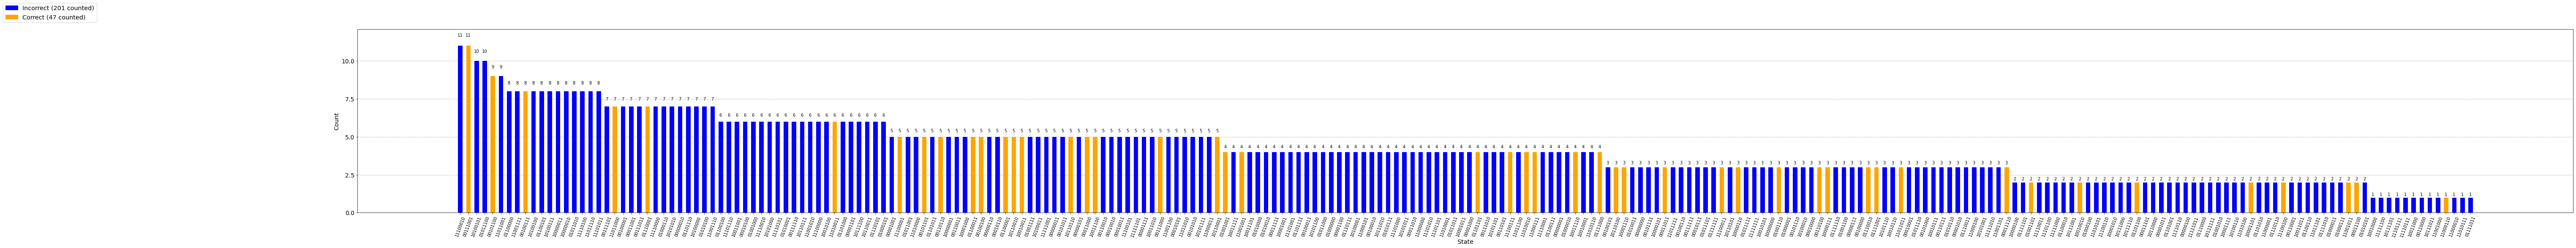

In [ ]:
grover = Grover(iterations = 0, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

###### **Solution**

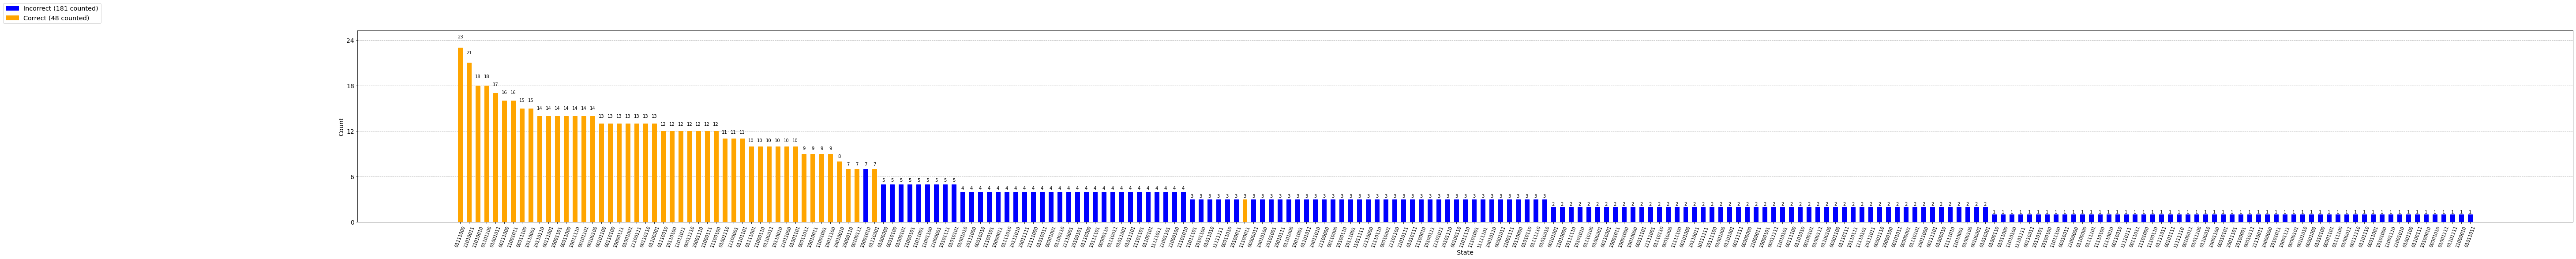

In [ ]:
grover = Grover(iterations = 1, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

#### **Problem #2.3.2**

Now, let's solve a bigger problem:

| **Time \| Route** | **Boston to DC (2 hours)** | **DC to Los Angeles (6 hours)** |
|-------------------|----------------------------|---------------------------------|
| **9 am**          | Route 0                    | Route 1                         |
| **12 pm**         | Route 2                    | Route 3                         |
| **3 pm**          | Route 4                    | Route 5                         |

<br>

The restrictions are the same as above, but now include:
* Route 1 and Route 4 must use different planes since the plane flying Route 1 will have just landed in Los Angeles and so cannot takeoff from Boston.
* Route 1 and Route 5 must use different planes for the same reason.
* Route 2 and Route 3 must use different planes since they take off at the same time.
* Route 2 and Route 4 must use different planes since the plane flying Route 2 will not have time to return to Boston for Route 4.
* Route 3 and Route 4 must use different planes since the plane flying Route 3 will still be in the air when Route 4 is meant to start.
* Route 3 and Route 5 must use different planes for the same reason.
* Route 4 and 5 must use different planes since they take off at the same time.

<br>

**NOTE**: The size of the problem and the fact there's multiple correct solutions means this problem may take a long time to run and, even more so, to solve well. As such it is ok if you do not get perfect results for this problem. Rather, we leave it to you to continue on after completing the project notebook to determine a way to get around these problems. This could include:
* Using a more efficient simulator.
* Considering if any variables can be removed from the problem. For instance, a Route that cannot overlap with *any* other Route can be assigned a plane and then both that Route and plane can be completely removed from the problem (meaning it is now a 3 Coloring Problem).
* Redefining the way we use Grover's algorithm.

##### **1. Define the problem.**

Complete the code below to define this specific problem.

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [# COMPLETE THIS LINE
check_qubits = [# COMPLETE THIS LINE
output_qubit = # COMPLETE THIS LINE
disagree_list = [ # COMPLETE THIS CODE
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

###### **Solution**

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
check_qubits = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
output_qubit = 24
disagree_list = [[[0, 1], [2, 3]],
                 [[0, 1], [4, 5]],
                 [[2, 3], [4, 5]],
                 [[2, 3], [6, 7]],
                 [[4, 5], [6, 7]],

                 [[2, 3], [8, 9]],
                 [[2, 3], [10, 11]],

                 [[4, 5], [6, 7]],
                 [[4, 5], [8, 9]],
                 [[6, 7], [8, 9]],
                 [[6, 7], [10, 11]],
                 [[8, 9], [10, 11]]
                ]

# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

##### **2. Solve the problem.**

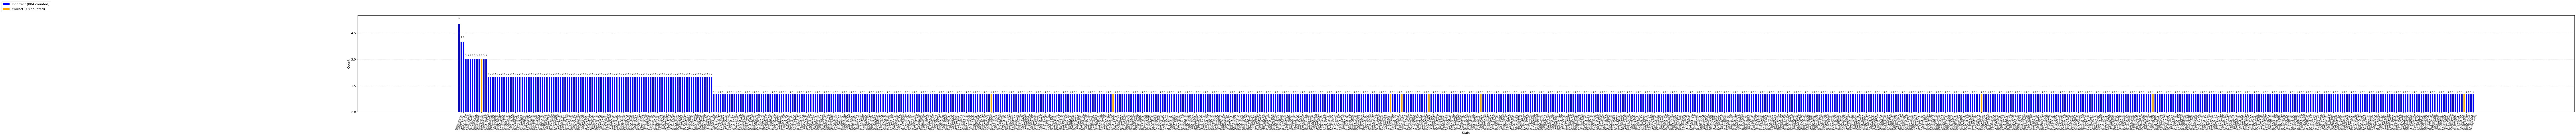

In [ ]:
grover = Grover(iterations = 0, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

###### **Solution**

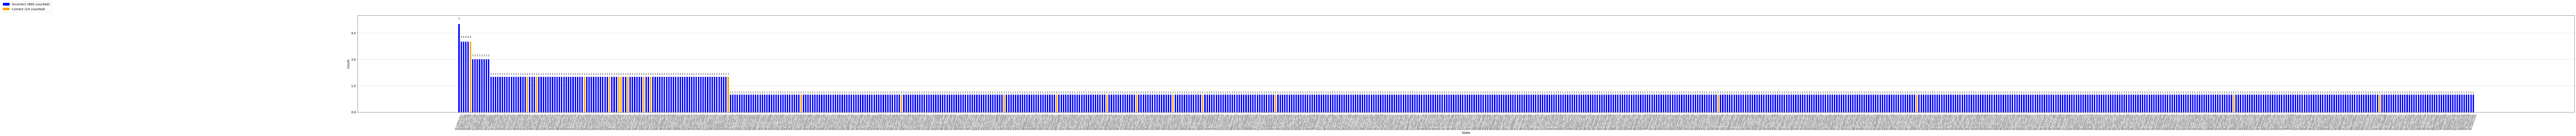

In [ ]:
grover = Grover(iterations = 1, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

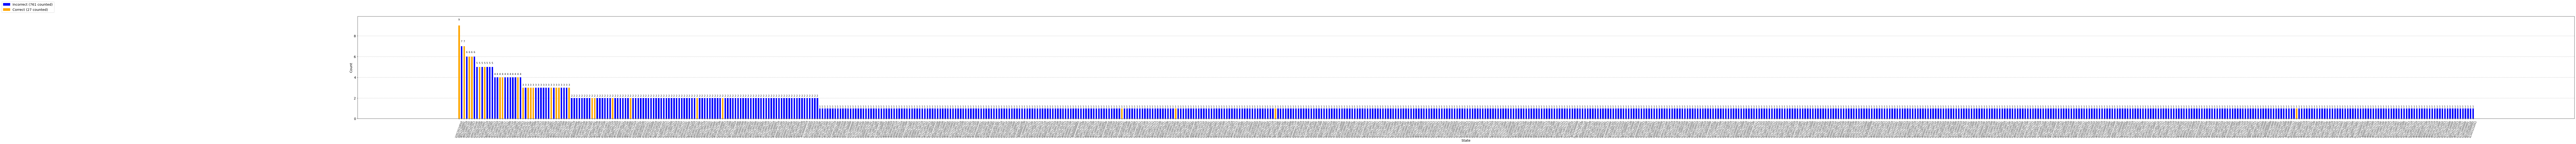

In [ ]:
grover = Grover(iterations = 2, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

#### **Problem #2.3.3**

Now, apply what you have learned so far to solving this problem:

| **Time \| Route** | **Boston to DC (2 hours)** | **DC to Los Angeles (6 hours)** | **DC to Boston (2 hours)** |
|-------------------|----------------------------|---------------------------------|----------------------------|
| **9 am**          | Route 0                    | Route 1                         | Route 2                    |
| **12 pm**         | Route 3                    | Route 4                         | Route 5                    |

##### **1. Define the problem.**

Complete the code below to define this specific problem.

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [# COMPLETE THIS LINE
check_qubits = [# COMPLETE THIS LINE
output_qubit = # COMPLETE THIS LINE
disagree_list = [ # COMPLETE THIS CODE
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

###### **Solution**

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
check_qubits = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
output_qubit = 24
disagree_list = [[[0, 1], [2, 3]],
                 [[0, 1], [4, 5]],
                 [[0, 1], [6, 7]],

                 [[2, 3], [4, 5]],
                 [[2, 3], [6, 7]],
                 [[2, 3], [8, 9]],
                 [[2, 3], [10, 11]],

                 [[4, 5], [8, 9]],
                 [[4, 5], [10, 11]],

                 [[6, 7], [8, 9]],
                 [[6, 7], [10, 11]],

                 [[8, 9], [10, 11]]
                ]

# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

##### **2. Solve the problem.**

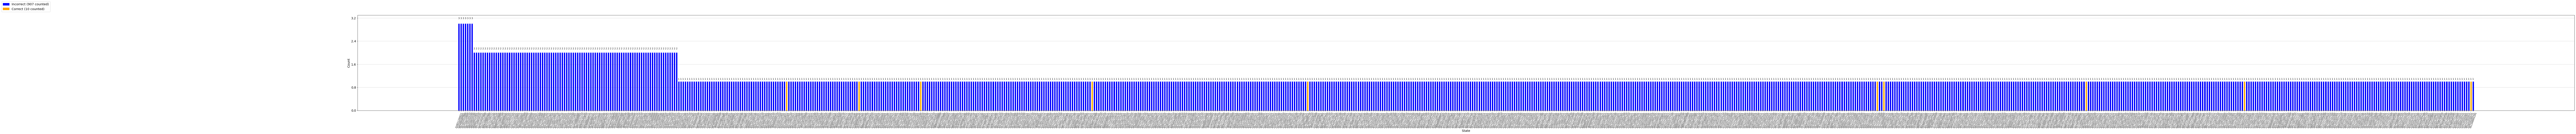

In [ ]:
grover = Grover(iterations = 0, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

###### **Solution**

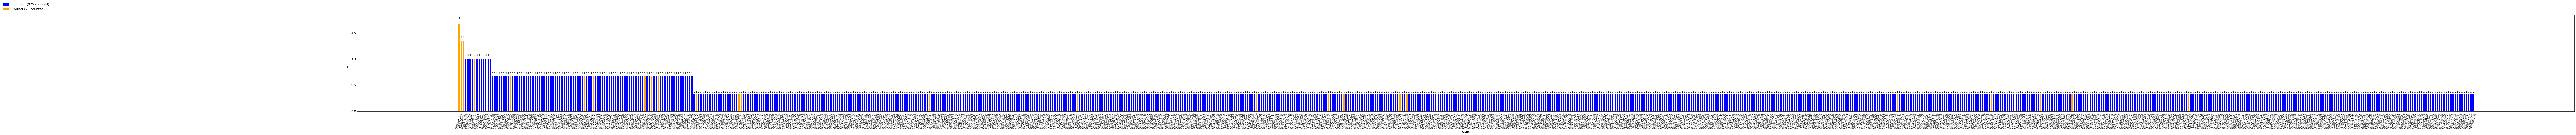

In [ ]:
grover = Grover(iterations = 1, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

##### **1. Define the problem.**

Complete the code below to define this specific problem.

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [# COMPLETE THIS LINE
check_qubits = [# COMPLETE THIS LINE
output_qubit = # COMPLETE THIS LINE
disagree_list = [ # COMPLETE THIS CODE
                 ]


# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

###### **Solution**

In [ ]:
# DEFINE THE VARIABLES
variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
check_qubits = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
output_qubit = 24
disagree_list = [[[0, 1], [2, 3]],
                 [[0, 1], [4, 5]],
                 [[0, 1], [6, 7]],

                 [[2, 3], [4, 5]],
                 [[2, 3], [6, 7]],
                 [[2, 3], [8, 9]],
                 [[2, 3], [10, 11]],

                 [[4, 5], [8, 9]],
                 [[4, 5], [10, 11]],

                 [[6, 7], [8, 9]],
                 [[6, 7], [10, 11]],

                 [[8, 9], [10, 11]]
                ]

# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle_4c(disagree_list, variable_qubits, check_qubits, output_qubit)


# DEFINE THE AmplificationProblem
def check_disagreement(state): return check_disagree_list_general_4c(state, disagree_list)

problem = AmplificationProblem(oracle, 
                               state_preparation = prep,
                               objective_qubits = variable_qubits,
                               is_good_state = check_disagreement
                               )

##### **2. Solve the problem.**

In [ ]:
grover = Grover(iterations = 0, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)

###### **Solution**

In [ ]:
grover = Grover(iterations = 1, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

plot_results(results, check_disagreement)